# Deep learning for multiclass text classification
#### Applied Text Mining - Utrecht Summer School

Welcome to the sixth practical of the course “Applied Text Mining”. In this practical, we will apply various deep learning models for multiclass classification. We will work with the 20 Newsgroups data set from the sklearn library and will apply deep learning models on that using the Keras library. 

The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups. It was originally collected by Ken Lang, and it has become a popular data set for experiments in text applications of machine learning techniques.

On the other hand, today we will use the Keras library, which is a deep learning and neural networks API by François Chollet which is capable of running on top of Tensorflow (Google), Theano or CNTK (Microsoft).

Today we will use the following libraries. Take care to have them installed!

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras import layers

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Let's get started!

1\. **Load the tarin and test subsets of the 20 Newsgroups data set from sklearn datasets. Remove the headers, footers and qoutes from the news article when loading data sets. Use 45 for random_state. In order to get faster execution times for this practical we will work on a partial dataset with only 5 categories out of the 20 available in the dataset ('rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med').**

In [3]:
categories = ['rec.sport.hockey', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [4]:
twenty_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), 
                                  categories=categories, shuffle=True, random_state=321)
# type(twenty_train)

In [5]:
twenty_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), 
                                 categories=categories, shuffle=True, random_state=321)

2\. **Find out about the number of news articles in train and test sets.**

In [6]:
twenty_train.target_names

['comp.graphics',
 'rec.sport.hockey',
 'sci.med',
 'soc.religion.christian',
 'talk.politics.mideast']

In [7]:
twenty_train.filenames.shape

(2941,)

In [8]:
twenty_test.filenames.shape

(1958,)

3\. **Covert the train and test to dataframes.**

In [9]:
import pandas as pd
df_train = pd.DataFrame(list(zip(twenty_train.data, twenty_train.target)), columns=['text', 'label'])
df_train.head()

,text,label
0,\nDr. cheghadr bA namakand! They just wait un...,4
1,\n\n\n\n\n:) No...I was one of the lucky ones....,2
2,\n\n[After a small refresh Hasan got on the tr...,4
3,Before getting excited and implying that I am ...,4
4,I have posted disp135.zip to alt.binaries.pict...,0


In [10]:
df_test = pd.DataFrame(list(zip(twenty_test.data, twenty_test.target)), columns=['text', 'label'])
df_test.head()

,text,label
0,"hi all, Ive applied for the class of 93 at qui...",2
1,:In article <enea1-270493135255@enea.apple.com...,2
2,"\nI don't know the answer the to this one, alt...",0
3,\n\nWe here at IBM have the same problem with ...,0
4,\nI was at an Adobe seminar/conference/propaga...,0


# Train a neural network with document-term matrix

4\. **In order to feed predictive deep learning models with the text data, one first needs to turn the text into vectors of numerical values suitable for statistical analysis. Use the binary representation with TfidfVectorizer and create document-term matrices for test and train (name them X_train and X_test).**

In [11]:
tfidf = TfidfVectorizer(binary=True)

def tfidf_features(txt, flag):
    if flag == "train":
        x = tfidf.fit_transform(txt)
    else:
        x = tfidf.transform(txt)
    x = x.astype('float16')
    return x 

X_train = tfidf_features(df_train.text.values, flag="train")
X_test = tfidf_features(df_test.text.values, flag="test")

# With CountVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train = count_vect.fit_transform(df_train.text.values)
# X_train.shape
# X_test = count_vect.transform(df_test.text.values)

In [12]:
X_train.nnz / float(X_train.shape[0])

111.5678340700442

The extracted vectors are very sparse, with an average of 111 non-zero components by sample in a more than 37000-dimensional space (less than 0.3% non-zero features)

In [13]:
X_test.nnz / float(X_train.shape[0])


75.78748724923496

In [14]:
tfidf.vocabulary_

{'dr': 11831,
 'cheghadr': 7790,
 'ba': 5229,
 'namakand': 23053,
 'they': 33351,
 'just': 19216,
 'wait': 35850,
 'until': 34946,
 'are': 4507,
 'teenagers': 33019,
 'to': 33637,
 'kill': 19570,
 'them': 33280,
 'huh': 17121,
 'yup': 36995,
 'iri': 18569,
 'also': 3839,
 'granted': 15615,
 'great': 15673,
 'deal': 10311,
 'of': 24102,
 'reconstruction': 27894,
 'houses': 17031,
 'and': 4048,
 'buildings': 6819,
 'in': 17695,
 'war': 35900,
 'torn': 33751,
 'areas': 4509,
 'malaysia': 21218,
 'khak': 19512,
 'too': 33713,
 'sareshoon': 29498,
 'one': 24265,
 'the': 33264,
 'only': 24281,
 'industries': 17864,
 'we': 36023,
 'really': 27764,
 'have': 16323,
 'is': 18615,
 'construction': 9123,
 'there': 33323,
 'all': 3748,
 'these': 33341,
 'unemployed': 34686,
 'youth': 36969,
 'give': 15292,
 'money': 22531,
 'do': 11634,
 'what': 36180,
 'iranians': 18556,
 'can': 7145,
 'should': 30510,
 'be': 5586,
 'doing': 11683,
 'no': 23621,
 'was': 35945,
 'lucky': 20918,
 'ones': 24270,
 've

5\. **Use the LabelEncoder to create y_train and y_test.**

In [16]:
# Converting the list of strings to the matrix of vectors (to be fed neural network models)
# Encode the list of newsgroups into categorical integer values
import keras
lb = LabelEncoder()
y = lb.fit_transform(df_train.label.values)
y_train = keras.utils.to_categorical(y)

In [17]:
y_train.shape

(2941, 5)

In [18]:
y = lb.transform(df_test.label.values)
y_test = keras.utils.to_categorical(y)


6\. **Use the sequential API in Keras and create a one-hidden-layer neural network. So, the first layer will be input layer with the number of features in your X_train, then one hidden layer, then one output layer. Set the number of neurons 5 in the hidden layer and activation function as relu. For the output layer you can use a softmax activation function.**

The sequential API (https://www.tensorflow.org/guide/keras/sequential_model) allows you to create models layer by layer. It is limited in that it does not allow to create models that share layers or have multiple inputs or outputs.

The functional API (https://www.tensorflow.org/guide/keras/functional) allows you to create models that have a lot more flexibility as you can define models where layers connect to more than just the previous and next layers. In this way, you can connect layers to (literally) any other layer. As a result, creating complex networks such as Siamese neural networks and residual neural networks become possible.

In [19]:
model = Sequential()
input_dim = X_train.shape[1]  # Number of features
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

7\. **The compile function defines the loss function, the optimizer and the metrics. Call this function for your neural network model with loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']. Check the summary of the model.**

| Task           | Output type                       | Last-layer activation | Loss function            | Metric(s) |
| ---            | ---                               | ---                   | ---                      | ---       |
| Regression     | Numerical                         | Linear                | meanSquaredError (MSE),<br> meanAbsoluteError (MAE) | Same as loss |
| Classification | Binary                            | Sigmoid               | binary_crossentropy      | Accuracy, precision, recall, sensitivity, <br> TPR, FPR, ROC, AUC |
| Classification | Single label, Multiple classes    | Softmax               | categorical_crossentropy | Accuracy, confusion matrix |
| Classification | Multiple labels, Multiple classes | Sigmoid               | binary_crossentropy      | Accuracy, precision, recall, sensitivity, <br> TPR, FPR, ROC, AUC |

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                371490    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 371,545
Trainable params: 371,545
Non-trainable params: 0
_________________________________________________________________


8\. **Time to train your model! Train your model in 20 iterations. What is batch_size?**

In [34]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512)
# model.save_weights("model.h5")
# print("Saved model to disk")

Epoch 1/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2805 - accuracy: 0.9558
Epoch 2/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2696 - accuracy: 0.9599
Epoch 3/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2591 - accuracy: 0.9626
Epoch 4/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.9660
Epoch 5/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2388 - accuracy: 0.9670
Epoch 6/20
6/6 [==============================] - 0s 4ms/step - loss: 0.2292 - accuracy: 0.9680
Epoch 7/20
6/6 [==============================] - 0s 6ms/step - loss: 0.2199 - accuracy: 0.9708
Epoch 8/20
6/6 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.9708
Epoch 9/20
6/6 [==============================] - 0s 5ms/step - loss: 0.2023 - accuracy: 0.9711
Epoch 10/20
6/6 [==============================] - 0s 5ms/step - loss: 0.1939 - accuracy: 0.9718
Epoch 11/20
6/6 [======================

Note that if you rerun the fit() method, you will start off with the computed weights from the previous training. Make sure to call clear_session() before you start training the model again:

**from keras.backend import clear_session <br>
clear_session()**

9\. **Plot the accuracy and loss of your trained model.**

dict_keys(['loss', 'accuracy'])


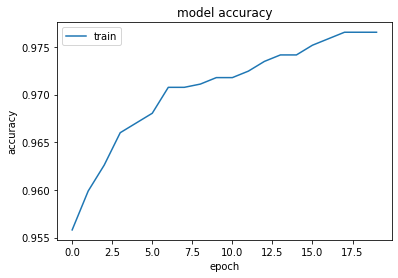

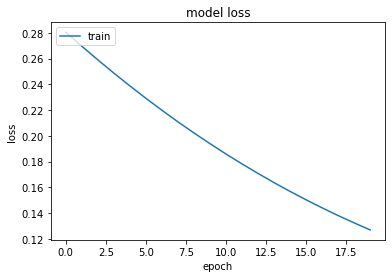

In [35]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [77]:
# convert the code to a function
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Training and validation loss')
    plt.legend()

10\. **Evaluate the accuracy of your trained model on the test set. Compare that with the accuarcy of train.**

In [33]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss,accuracy))

62/62 [==============================] - 0s 785us/step - loss: 0.3439 - accuracy: 0.7916
Test set
  Loss: 0.344
  Accuracy: 0.792


You can already see that the model was overfitting since it reached over 95% accuracy for the training set. When training a model, you can use a separate testing and validation set. What you would usually do is take the model with the highest validation accuracy and then test the model with the testing set.

# The embedding layer

11\. **Plot the dendrogram of the hierarchical clustering.**

In [38]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df_train.text.values)



In [39]:
X_train = tokenizer.texts_to_sequences(df_train.text.values)
X_test = tokenizer.texts_to_sequences(df_test.text.values)

In [40]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index for sequence padding
vocab_size

38111

In [49]:
print(df_train.text.values[21])
print(X_train[21])


Absolutely.  Unfortunately, most of them have had 3 weeks of neurology
in medical school and 1 month (maybe) in their residency.  Most
of that is done in the hospital where migraines rarely are seen.
Where are they supposed to learn?  Those who are diligent and
read do learn, but most don't, unfortunately.


We are the only ones, sometimes, who have enough interest in headaches
to spend the time to get enough history to diagnose them.  Too often,
the primary care physician hears "headache" and loses interest in
anything but giving the patient analgesics and getting them out of
the office so they can get on to something more interesting.



I hope you meant "inarguably".

-- 
----------------------------------------------------------------------------
Gordon Banks  N3JXP      | "Skepticism is the chastity of the intellect, and
geb@cadre.dsl.pitt.edu   |  it is shameful to surrender it too soon." 
[    3  1227   103    44    16 15328     4   202    47  1227    25   117
    68  1154    3

In [42]:
for word in ['the', 'all', 'happy', 'sad']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

the: 1
all: 35
happy: 1043
sad: 3422


Note that the a document-term matrix uses vectors of word counts, and each vector has the same length (the size of the total corpus vocabulary). With Keras Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts, but rather correspond to the word values from the dictionary tokenizer.word_index.

12\. **Use the pad_sequence() function to pad each text sequence with zeros, so that each vector has the same length.**

In [43]:
from keras.preprocessing.sequence import pad_sequences

In [44]:
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [47]:
print(X_train[0, :])

[  555 12221    23    75  1507   379    23    16 15253     3   621    63
  5371 10293    73  2745     5   246   686     2 10294     2  2340     4
  3927     6   332  4110  1290     3 12222   131    37     2     1    72
  7235    34   177    21     7  3928     4    33    16    35    86 12223
  3226     4    23   241   753     3 12222     3    47    38  7953    42
     4    93    17   364     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]


Typically it does not matter whether you prepend or append zeros. The first values represent the index in the vocabulary, and the rest are zeros from sequence padding, since you have a short document.

13\. **Take the output of the embedding layer and plug it into a Dense layer with 10 neurons, and the relu activation function. In order to do this you have to add a Flatten layer in between that prepares the sequential input for the Dense layer. Note that in the Embedding layer, input_dim is the size of the vocabulary, output_dim is the size of the embedding vector, and input_length is the length of the text sequence.**

In [74]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           1905550   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                50010     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
Total params: 1,955,615
Trainable params: 1,955,615
Non-trainable params: 0
_________________________________________________________________


You can now see that we have 1905550 new parameters to train. This number comes from vocab_size (38111) times the embedding_dim (50). These weights of the embedding layer are randomly initialized and then are adjusted through backpropagation during training. This model takes the words as they come in the order of the sentences as input vectors. 

In [65]:
from keras.backend import clear_session


In [68]:
clear_session()

In [72]:
del model

In [75]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=64)

In [61]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9803
Testing Accuracy:  0.7375


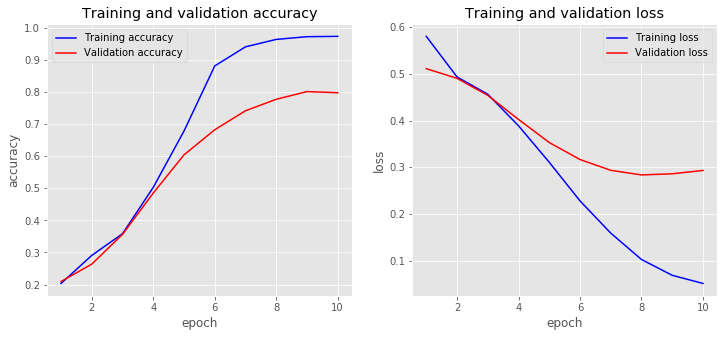

In [78]:
plot_history(history)

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding. You can think of the pooling layers as a way to downsample (a way to reduce the size of) the incoming feature vectors.

In [81]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 55        
Total params: 1,906,115
Trainable params: 1,906,115
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.7732
Testing Accuracy:  0.6721


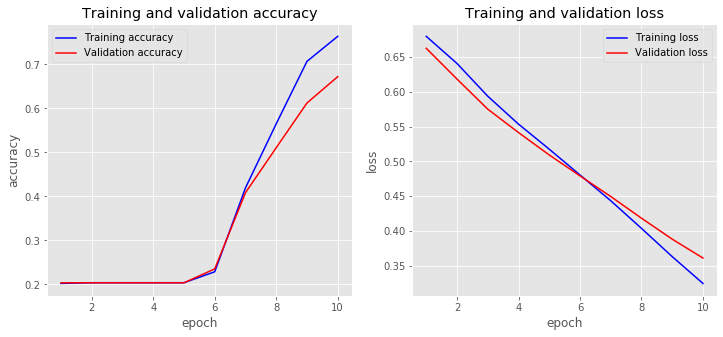

In [82]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Pretrained word embeddings (optional)

14\. **Google Word2Vec are precompute word embeddings simply trained on a large corpus of text. **

In [87]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [88]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix('data/glove_word_embeddings/glove.6B.50d.txt',
                                           tokenizer.word_index, embedding_dim)

In [89]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.7771771929364225

In [90]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
Total params: 1,906,115
Trainable params: 565
Non-trainable params: 1,905,550
_________________________________________________________________


Training Accuracy: 0.8031
Testing Accuracy:  0.7814


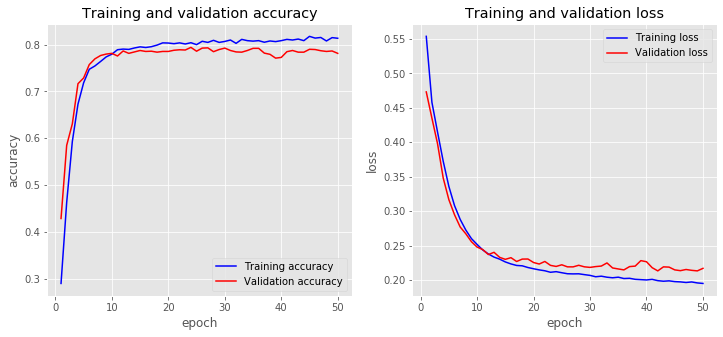

In [91]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Since the word embeddings are not additionally trained, it is expected to be lower. But let’s now see how this performs if we allow the embedding to be trained by using trainable=True:

In [111]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_56 (Embedding)     (None, 100, 50)           1905550   
_________________________________________________________________
global_max_pooling1d_53 (Glo (None, 50)                0         
_________________________________________________________________
dense_112 (Dense)            (None, 10)                510       
_________________________________________________________________
dense_113 (Dense)            (None, 5)                 55        
Total params: 1,906,115
Trainable params: 1,906,115
Non-trainable params: 0
_________________________________________________________________


Because it is a multiclass classification problem, log loss is used as the loss function (categorical_crossentropy in Keras). The efficient ADAM optimization algorithm is used. The model is fit for 50 epochs. A large batch size of 64 reviews is used to space out weight updates.

Training Accuracy: 0.9803
Testing Accuracy:  0.8458


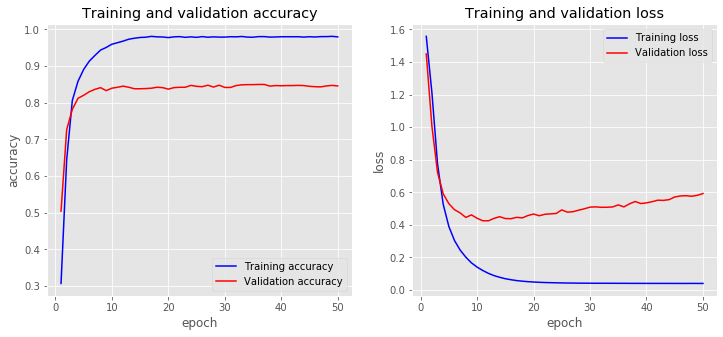

In [112]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

15\. **.**

# change to categorical_crossentropy and softmax

16\. **.**

# Recurrent neural networks

In [115]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_58 (Embedding)     (None, 100, 100)          3811100   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_116 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_117 (Dense)            (None, 5)                 55        
Total params: 3,892,565
Trainable params: 3,892,565
Non-trainable params: 0
_________________________________________________________________


The first layer is the Embedded layer that uses 32 length vectors to represent each word. The next layer is the LSTM layer with 100 memory units (smart neurons). Finally, because this is a classification problem we use a Dense output layer with a single neuron and a sigmoid activation function to make 0 or 1 predictions for the two classes (good and bad) in the problem.



Training Accuracy: 0.9680
Testing Accuracy:  0.7477


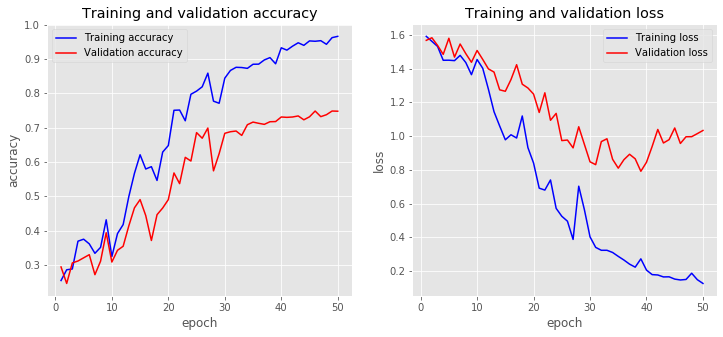

In [116]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Convolutional neural networks

Convolutional neural networks or also called convnets are one of the most exciting developments in machine learning in recent years. They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. When you are working with sequential data, like text, you work with one dimensional convolutions, but the idea and the application stays the same. 


In [96]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          3811100   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
Total params: 3,876,573
Trainable params: 3,876,573
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9803
Testing Accuracy:  0.8560


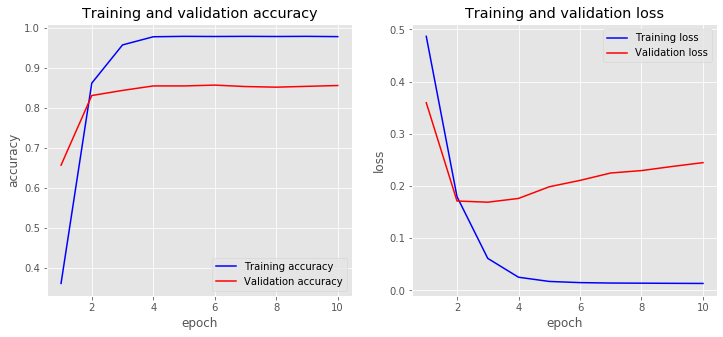

In [97]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

# Hyperparameter Optimization

One crucial steps of deep learning and working with neural networks is hyperparameter optimization.

https://realpython.com/python-keras-text-classification/

https://nlp.stanford.edu/projects/glove/

One popular method for hyperparameter optimization is grid search. What this method does is it takes lists of parameters and it runs the model with each parameter combination that it can find. It is the most thorough way but also the most computationally heavy way to do this. Another common way, random search, which you’ll see in action here, simply takes random combinations of parameters.

In [99]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [105]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [107]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
output_file = 'data/output.txt'

# Run grid search
print('Running grid search ...')
# Parameter grid for grid search
model = KerasClassifier(build_fn=create_model,
                        epochs = 10,
                        batch_size=64,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=5, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
with open(output_file, 'a') as f:
    s = ('Running {} data set\nBest Accuracy : '
         '{:.4f}\n{}\nTest Accuracy : {:.4f}\n\n')
    output_string = s.format(
        source,
        grid_result.best_score_,
        grid_result.best_params_,
        test_accuracy)
    print(output_string)
    f.write(output_string)

Running grid search ...
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError:  indices[62,3] = 9943 is not in [0, 5000)
	 [[node sequential_28/embedding_28/embedding_lookup (defined at c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:515) ]] [Op:__inference_train_function_177898]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_28/embedding_28/embedding_lookup:
 sequential_28/embedding_28/embedding_lookup/177603 (defined at c:\programdata\miniconda3\lib\contextlib.py:112)

Function call stack:
train_function


  FitFailedWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: Fi

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError:  indices[54,11] = 13975 is not in [0, 5000)
	 [[node sequential_38/embedding_38/embedding_lookup (defined at c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:515) ]] [Op:__inference_train_function_187138]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_38/embedding_38/embedding_lookup:
 sequential_38/embedding_38/embedding_lookup/186843 (defined at c:\programdata\miniconda3\lib\contextlib.py:112)

Function call stack:
train_function


  FitFailedWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
tensorflow.python.framework.errors_impl.InvalidArgumentError:  indices[41,12] = 15221 is not in [0, 5000)
	 [[node sequential_48/embedding_48/embedding_lookup (defined at c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:515) ]] [Op:__inference_train_function_196378]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_48/embedding_48/embedding_lookup:
 sequential_48/embedding_48/embedding_lookup/196083 (defined at c:\programdata\miniconda3\lib\contextlib.py:112)

Function call stack:
train_function


  FitFailedWarning)
c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

InvalidArgumentError:  indices[41,25] = 14803 is not in [0, 5000)
	 [[node sequential_53/embedding_53/embedding_lookup (defined at c:\programdata\miniconda3\lib\site-packages\sklearn\model_selection\_search.py:739) ]] [Op:__inference_train_function_200998]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_53/embedding_53/embedding_lookup:
 sequential_53/embedding_53/embedding_lookup/200703 (defined at c:\programdata\miniconda3\lib\contextlib.py:112)

Function call stack:
train_function
